Imports

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import misc
from datetime import datetime, timedelta
import numpy as np

Intro
==

Read in the data.

It contains 10,000 rows, and 12 features.

Already there are a lot of missing values to be seen. No numerical features too, which is interesting. Lots of dates, which will be awkward to deal with.

**Note:** There is a deprecated column in the dataset. Use of it is not recommended by the CDC page. It is removed from the get go to simplify calculations in this notebook, esp. w.r.t. duplicates.

In [43]:
data = pd.read_csv("covid19-cdc-16498802.csv", parse_dates=[0,1,2,3])




In [45]:
data = pd.read_csv("covid19-cdc-16498802.csv")

# There is depracted column that is removed straight away.
data = data.drop(["cdc_report_dt"], axis=1)

# Parse dates. This could be done in the read_csv command, but I wanted
# to make sure the format could be specified.
for column in data.columns[0:3]:
    data[column] = pd.to_datetime(data[column], format="%d/%m/%Y")

data

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-08-25,2020-08-27,2020-08-25,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Unknown,No,Unknown
1,2020-12-15,2020-12-15,NaT,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
2,2020-09-21,NaT,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
3,2021-01-04,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
4,2020-08-10,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-04-29,NaT,2020-04-29,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,Unknown,Missing,No,Missing
9996,2020-11-10,2020-11-05,2020-11-10,Laboratory-confirmed case,Unknown,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,No,No
9997,2020-10-07,2020-10-07,2020-10-07,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,Missing,Missing,No,No
9998,2020-06-30,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing


The first and last few rows.

In [46]:
display(data.head())
display(data.tail())

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-08-25,2020-08-27,2020-08-25,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Unknown,No,Unknown
1,2020-12-15,2020-12-15,NaT,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
2,2020-09-21,NaT,2020-09-21,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
3,2021-01-04,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
4,2020-08-10,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,No,Missing,No,Missing


,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020-04-29,NaT,2020-04-29,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,Unknown,Missing,No,Missing
9996,2020-11-10,2020-11-05,2020-11-10,Laboratory-confirmed case,Unknown,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,No,No
9997,2020-10-07,2020-10-07,2020-10-07,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,Missing,Missing,No,No
9998,2020-06-30,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
9999,2020-07-15,2020-07-16,2020-07-15,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,No,No,Missing


Data Types
==

Pandas is able to parse the dates, but doesn't do anything about categorical data by default.

Each field after the first 4 date fields seem to be straight forward categorical data.

In [47]:
data.nunique()

cdc_case_earliest_dt       327
pos_spec_dt                315
onset_dt                   328
current_status               2
sex                          4
age_group                   10
race_ethnicity_combined      9
hosp_yn                      5
icu_yn                       4
death_yn                     2
medcond_yn                   4
dtype: int64

They can all be set to "category".

There is no directly numeric data in the dataset!<br>
(Unless one counts as datetimes as numeric, but I will not for the time being)

In [5]:
cat_columns = data.columns[4:]

for field in cat_columns:
    data[field] = data[field].astype("category")
    
data.dtypes

cdc_case_earliest_dt       datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                     object
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

Constant Columns
==

It is clear, again looking at the nuniques() output, that there are no constant columns to be excluded.

In [6]:
data.nunique()

cdc_case_earliest_dt       327
pos_spec_dt                315
onset_dt                   328
current_status               2
sex                          4
age_group                   10
race_ethnicity_combined      9
hosp_yn                      5
icu_yn                       4
death_yn                     2
medcond_yn                   4
dtype: int64

Duplicate Rows
==

710 Duplicates. The question is whether these are to be expected in the data, or if they are likely a mistake.

In [34]:
# Note: this does not count the first occurance, 
# only the subsequent duplications of that first occurance.
len(data[data.duplicated()])

710

As a heuristic, if we imagine that the data is evenly distributed across all possible unique combinations of possible values for each field, the number of possible records is collosal, and might lead one at first to think that duplicates are unlikely.

In [8]:
data.nunique().prod()

3892105728000

However, the above assumption is far from true. The dates are not independent, as is clearly visible when they are plotted together, below

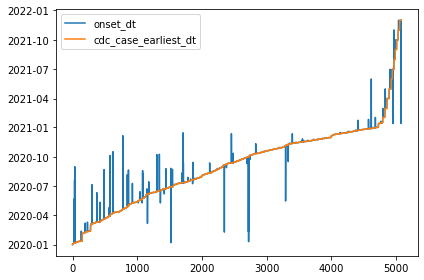

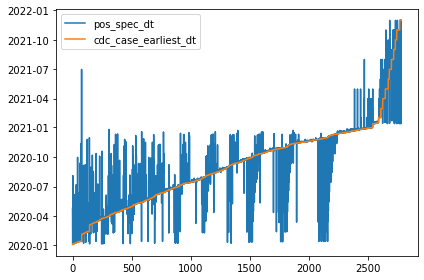

In [14]:
def compare_dates(field1, field2):
    
    temp_data = data[[field1, field2]].dropna()

    temp_data = temp_data.sort_values(field1)
    temp_data.index = list(range(len(temp_data)))

    x = temp_data.index
    y1 = temp_data[field1]
    y2 = temp_data[field2]

    plt.figure()
    plt.plot(x, y2, label=field2)
    plt.plot(x, y1, label=field1)
    plt.legend()

    
compare_dates("cdc_case_earliest_dt", "onset_dt")
misc.plt_save("onset vs earliest", "duplicates")

compare_dates("cdc_case_earliest_dt", "pos_spec_dt")
misc.plt_save("case vs earliest", "duplicates")

The actual number of records where the value for the other date fields deviates from the value of the case_earliest field significantly is not large. For the first one, it seems to be less than 10%, and for the second plot above (bearing in mind that only about 3000 are non-null) it seems to be about 15 or 20% of the total dataset.

We can count these directly though.

In [39]:
def find_distinct(field1, field2):

    temp_data = data[[field1, field2]].dropna()

    temp_data = temp_data.sort_values(field1)
    temp_data.index = list(range(len(temp_data)))

    x = temp_data.index
    y1 = temp_data[field1]
    y2 = temp_data[field2]

    # This is a roundabout way of tallying non-zero timedeltas.

    # y1 and y2 have datetimes. A datetime less a datetime is a timedelta.
    # The .days field converts this into an integer. A 0 is False, a 1 is True,
    # when converted to a boolean. When booleans are summed, the number of "True"s
    # is the result.

    # There is probably an easier way, but this works for now!

    result = (y2 - y1).apply(lambda x: x.days).astype(bool).sum()
    print("Count:", result)
    
    percentage = 100 * result / len(y2)
    print("%:", percentage)
    
    total_percentage = 100 * result / len(data)
    print("%:", total_percentage)
    
    

find_distinct("cdc_case_earliest_dt", "onset_dt")
find_distinct("cdc_case_earliest_dt", "pos_spec_dt")

Count: 117
%: 2.4168560214831647
%: 1.2594187298170076
Count: 1278
%: 46.40522875816993
%: 13.756727664155006


So a total of 14%, about, of records have distinct values for the different time fields.

Ignoring these for now and considering most of the population with either the same time (or null) for each time field, the calculation of possible records is much smaller.

In [11]:
counts = data.nunique()

# Dropping date fields after the first, since this is true
# for mabout 86% of the data set.
counts["pos_spec_dt"] = 1
counts["onset_dt"] = 1

# Dropping some very rare possibilities (About 1% each)

counts["sex"] -= 2 # "Missing" and "Unknown"

counts["age_group"] -= 1 # "Missing"
counts["race_ethnicity_combined"] -= 2 # "Native American", "Pacific Islanders"

counts["icu_yn"] -= 1 # "Yes"
counts["hosp_yn"] -= 1 # "OTH"

counts.prod()

7910784

Even with all of the above, we have about 791 times the number of possible values as actual values.

To take this further, if one was really inclined, I imagine one could derive an estimate of the number of expected unique possibilities given the current unique values and distributions for each feature. I won't go there though - that seems like overkill for this homework.

Perhaps the most important piece of information I'm missing here is how likely duplicates are to exist in the system in the first place. Are there already checks in place? It seems much easier to check for duplicates before the data is deidentified. And if so, it would make sense to assume that these duplicate records really do belong to different people. This is perhaps a question for a domain expert, or maybe even a member of the this project in the CDC.

For now, I'll assume that no such checks exist, and that the data really could be duplicated, on the basis of the rough calculations above.

The last thing that I'll factor into my decision is the impact dropping duplicates might have on the proportions of various values for the categorical fields.

To my considerable surprise, the impact is negligible, on proportions. I genuinly had to switch to bar plots just to confirm that the numbers had changed.

Given this, I don't think the duplicate rows add much information. And they seem unlikely to occur naturally. The easiest thing is just to drop them. (all)

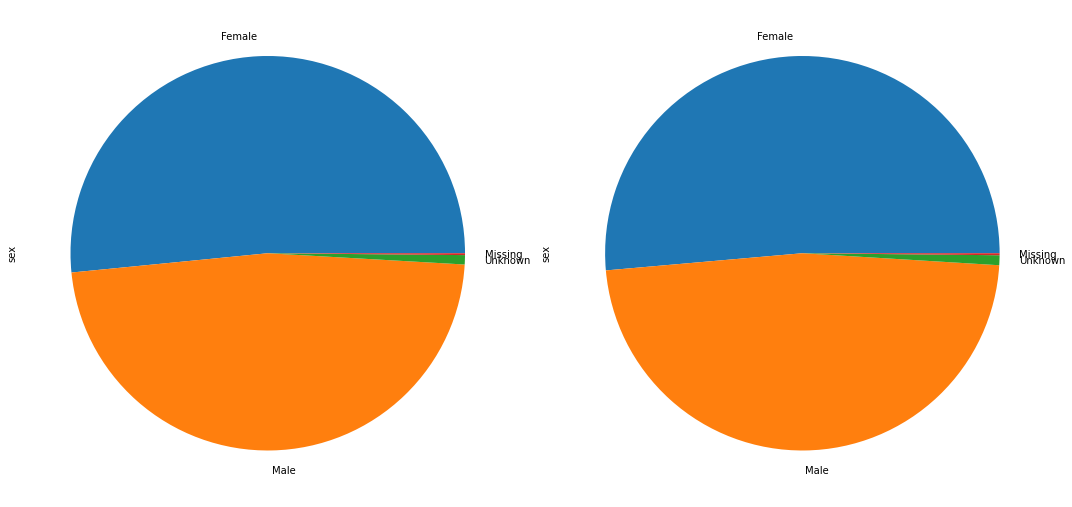

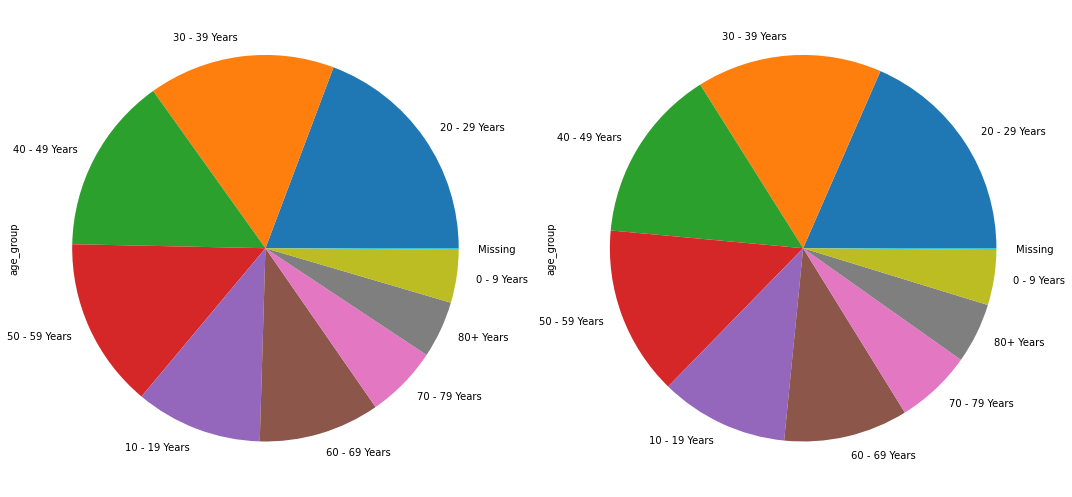

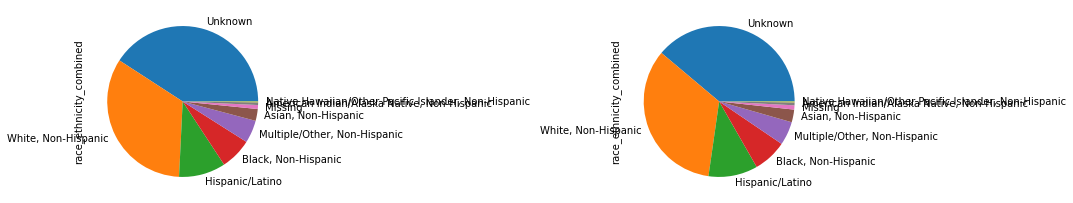

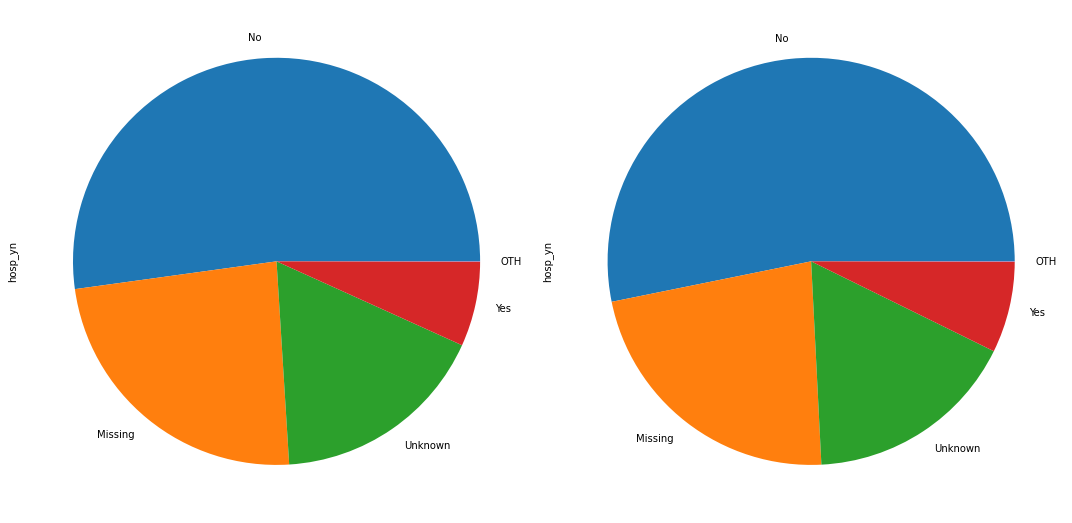

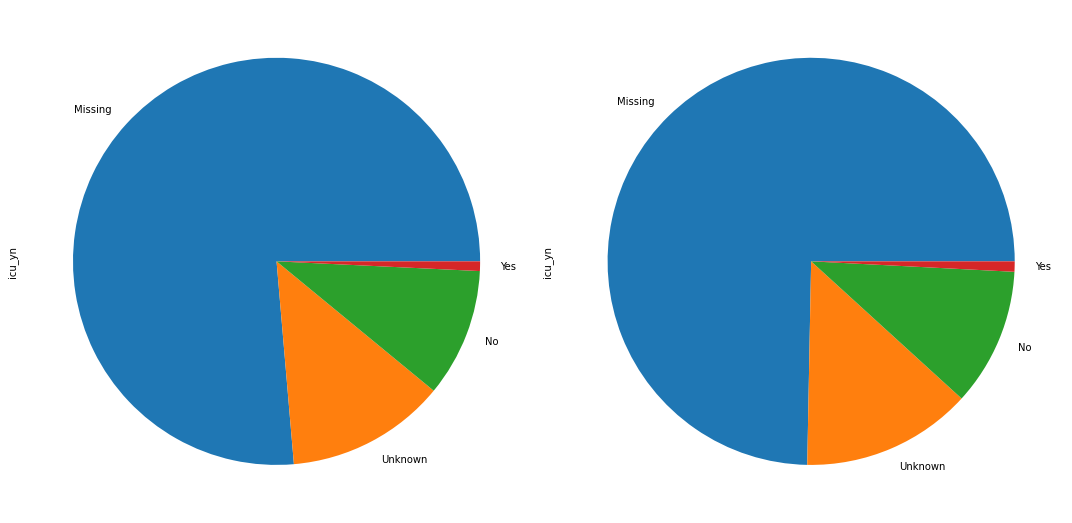

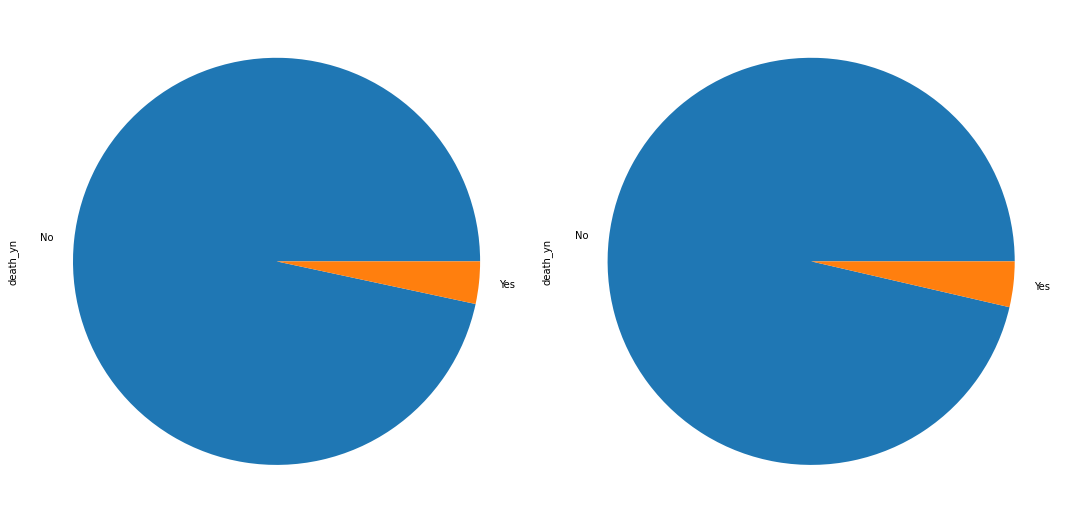

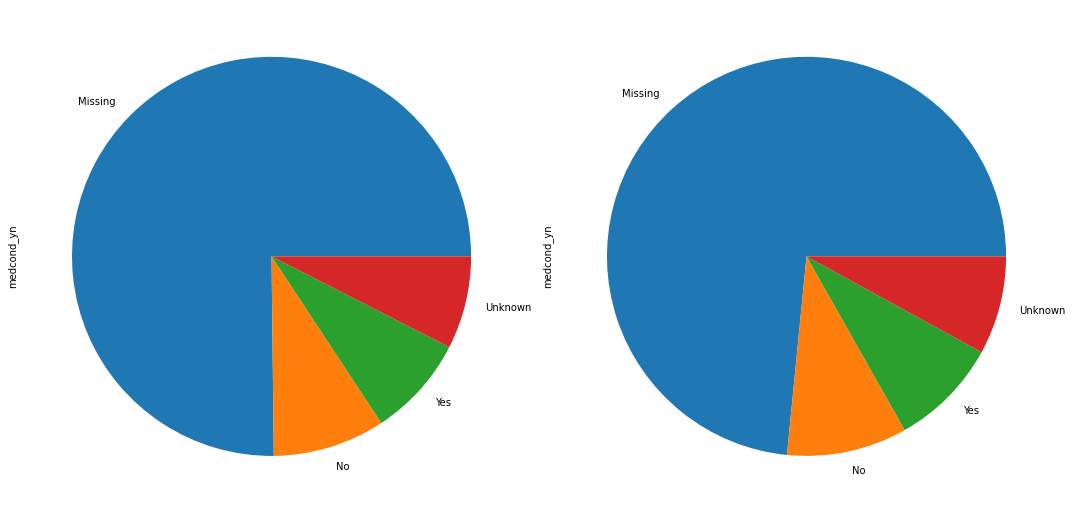

In [27]:
for field in cat_columns:
    
    series = data[field]
      
    # Plot with and without duplicates side by side.
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    
    data[field].value_counts().plot(kind="pie", ax=ax1)
    data.drop_duplicates()[field].value_counts().plot(kind="pie", ax=ax2)
    
    # Save output.
    misc.plt_save(field, "duplicates")

Duplicate Columns
==

None of the categorical columns come close to being duplicates.

However, there is a candidate duplicate date column worth considering, and that is "onset_dt".

As a reminder, I'm displaying the graph and count of differences below.

Count: 117
%: 1.17


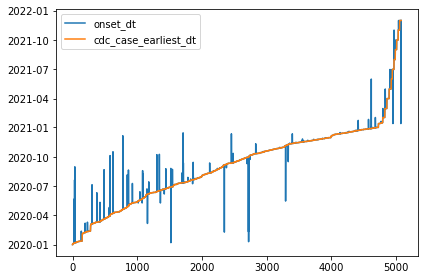

In [17]:
compare_dates("cdc_case_earliest_dt", "onset_dt")
find_distinct("cdc_case_earliest_dt", "onset_dt")

However, I'm electing not to count it as a duplicate.

This is because many rows are missing (about 50%), and while I don't think the date adds anything new (given that it is only different for about 1%  of cases), I think the presence of a date vs. the date being missing has promise as a feature for part 4.

Saving the Cleaned Dataset
==

As a recap, I'll read in the dataset again and apply changes before saving it.

In [51]:
result = pd.read_csv("covid19-cdc-16498802.csv")

# There is depracted column that is removed straight away.
result = result.drop(["cdc_report_dt"], axis=1)

# Parse dates manually
for column in data.columns[0:3]:
    data[column] = pd.to_datetime(data[column], format="%d/%m/%Y")

# Drop all duplicates. (about 7% of the data)
result = result.drop_duplicates(keep="first")

result.to_csv("data_after_part1.csv")